# **Sentimental Analysis of News headlines**


## Load dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
# pip install TextBlob

In [4]:
data = pd.read_csv('india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


- As we can see in `headline_category` column there are some cities name, let's separate this cities name

In [5]:
data['headline_category'].value_counts()   

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
actresses                       7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

- only take that data that contain 'city' word and store that data in new dataframe 'city_data'

In [6]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [7]:
# takes only that headline_category which contain `city word`
city_data

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


- create a new temparory dataframet which have only one column `city_name` 

In [8]:
city_split = pd.DataFrame(columns=['city_name'])

- split city word and name of city which join by '.' we need only cities name and stored it in to 'city_name' column

In [9]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [10]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [11]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [12]:
# re-setting the index
city_data.reset_index(inplace=True)

In [13]:
# see the final data which contain city_name column
city_data.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [14]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

In [15]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [16]:
# for better understanding remane the column
city_headline.rename(columns={'headline_text':'No._headline_text'},inplace=True)

In [17]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='No._headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


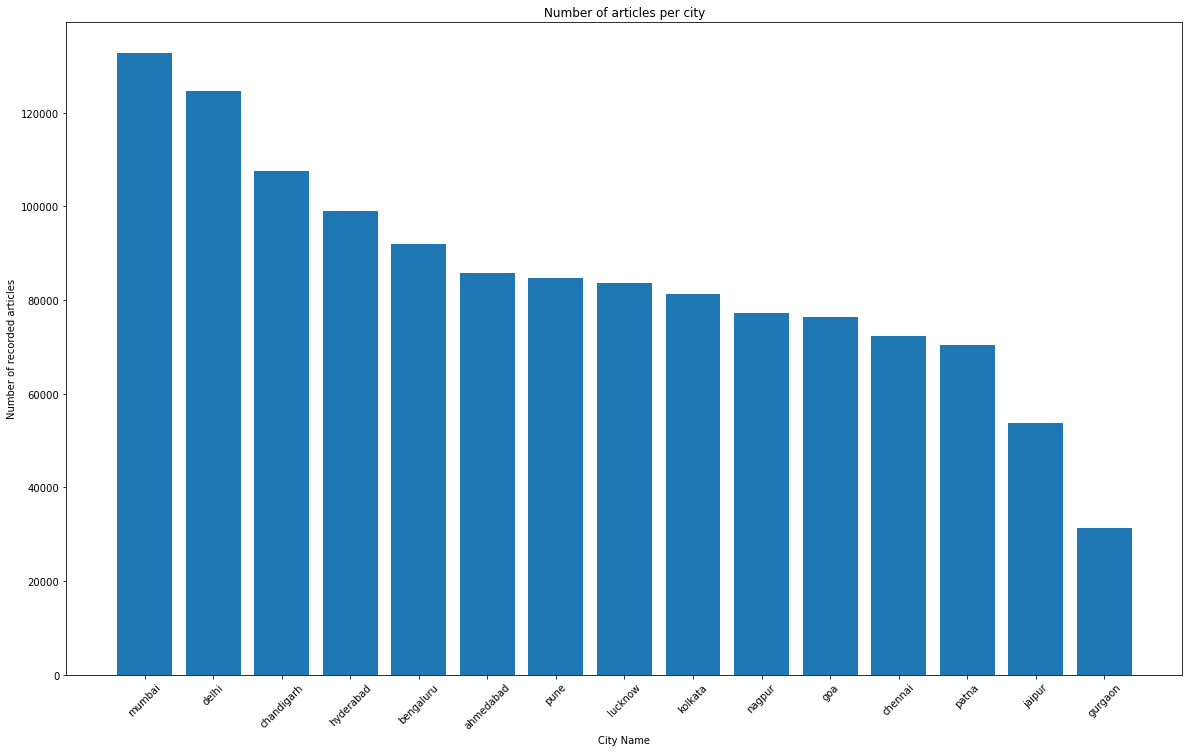

In [18]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(20,12))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['No._headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

Not so surprisingly, **Mumbai and Delhi** lead the list. Following these two cities, the decrease is fairly uniform until the sharp drop in coverage from **patana**.

### **Let's check `Year-Wise` coverage for cities**

In [19]:
city_data.dtypes   
# publish data have "int" datatype we have to change that into "datetime"

index             int64
publish_date      int64
headline_text    object
city_name        object
dtype: object

**changing datatype from int to datetime**

In [21]:
city_data['publish_date'] = pd.to_datetime(city_data['publish_date'])
city_data.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


- we are extrating only **years** from `publish_date` column

In [22]:
city_data['Year'] = city_data['publish_date'].apply(lambda x: (x.microsecond)//10)

In [23]:
# dropping unnecessary columns
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)

- final data with year-wise

In [24]:
# final result
city_data.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


- Lets consider a new column **`No_headline_text`** which contains value `one`, so we can count No. of text from each city per year
- make sure that you should always make copy of original data

In [26]:
city_data_2 = city_data.copy()
city_data_2['No_headline_text'] = 1

In [27]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [28]:
city_data_2.head()

,city_name,Year,No_headline_text
0,bengaluru,2001,1
1,patna,2001,1
2,bengaluru,2001,1
3,delhi,2001,1
4,patna,2001,1


- as i already calculateed top 15 cities with high no. of headlines 
- now we consider only top `7 cities` for **year-wise coverage**

In [29]:
top_15_headline_city.head(7)

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620


we limit the graph to the `top 7 cities` which have high no. of headline: **Mumbai, Delhi, Chandigarh, Hyderabad, Bengaluru ,pune and Ahmedabad** if we try plot **all the cities**, so plot is quite messi to understand that's why we take limited cities

In [30]:
# creating new data_set for top 7 cities with year 

city_del = city_data_2[city_data_2.city_name == 'mumbai']
city_mum = city_data_2[city_data_2.city_name == 'delhi']
city_chan = city_data_2[city_data_2.city_name == 'chandigarh']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_bang = city_data_2[city_data_2.city_name == 'bengaluru']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_pune = city_data_2[city_data_2.city_name == 'pune']

- Finally we concate **all datasets** and create a final data which **contain top 7 cities year-wise coverage**

In [31]:
famous_cities = [city_del, city_mum, city_chan, city_hyd, city_bang, city_ahme, city_pune]
data_famous_cities = pd.concat(famous_cities)

In [32]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)  

In [33]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(726075, 4)


,index,city_name,Year,No_headline_text
0,37,mumbai,2001,1
1,41,mumbai,2001,1
2,51,mumbai,2001,1
3,55,mumbai,2001,1
4,57,mumbai,2001,1


In [34]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['No_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['No_headline_text'].unstack()

- **year-wise** data which shows **which city have how many no. of headline text**

In [36]:
city_count.head()

city_name,ahmedabad,bengaluru,chandigarh,delhi,hyderabad,mumbai,pune
Year,,,,,,,
2001,3131,5739,2283,2462,4493,2465,1534
2002,5251,7170,5047,4845,6547,4366,3357
2003,4446,4382,5476,4850,5475,3762,3790
2004,2657,2759,3714,5926,2523,2822,2904
2005,1736,1714,1106,2880,1539,1556,974


- year-wise no. of headlines text

In [35]:
city_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: No_headline_text, dtype: int64

- let's visulize **Number of articles(headline text) per year and per city**

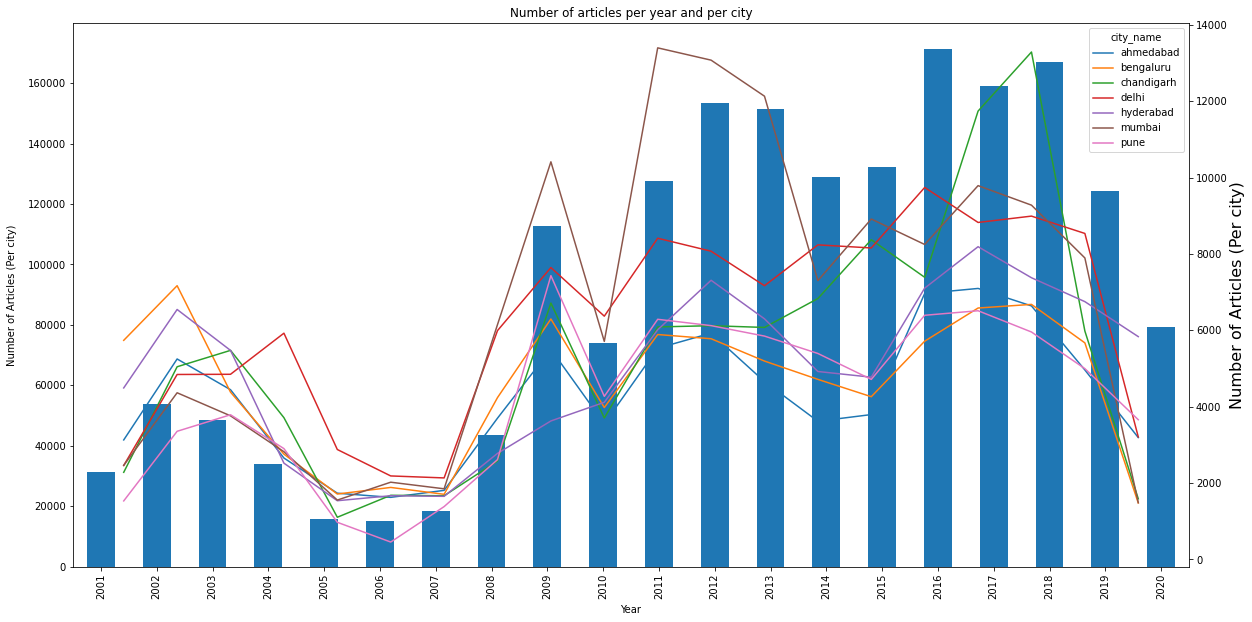

<Figure size 1440x720 with 0 Axes>

In [37]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

The graph for the cities was **not uniform** and hence we **overlap on it a graph for the number of city-based articles by year**. This way, we can disregard the apparent non-uniformity in city-based reporting over the years.

### **Let's see which Topic that have high no. of Coverage**

In [38]:
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [39]:
# for safety always take copy of original data
new_data = data.copy()

- creating a new column `category` that contains **headline categories**

In [40]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])

In [41]:
new_data.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


- groupby categories and let's see **which category topic have high no. of headline**

In [42]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

- dropping some un-wanted category like **`unknown, tv, top-stories, city, citizen, edit-page etc`**

In [44]:
top_10_cat = top_categories.drop(['unknown', 'tv', 'top-stories', 'city', 'citizen', 'edit-page','top-headlines','world']).head(10)
top_10_cat

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [45]:
# reset index
top_10_cat.reset_index(inplace=True)

- `top_10_cat` let's see the **top 10 categories with No. of headlines** ( india, entertainment, business, sports, life-style, tech, etc)

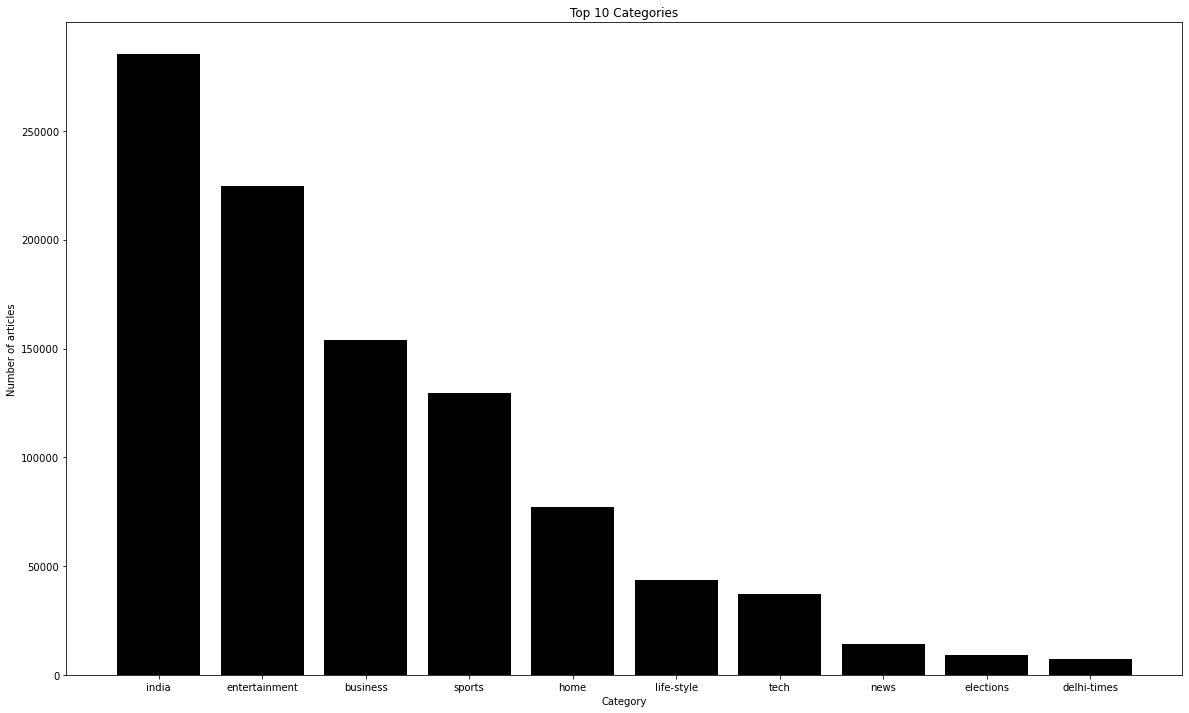

In [46]:
# visualizing top 10 categories 

plt.figure(figsize=(20,12))
plt.bar(top_10_cat.category, height=top_10_cat.headline_text,color = 'black')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

**India is the most published** since the publication is based in India. Interestingly, **Entertainment is the second-most covered topic** by TOI. In fact, it's eye-opening how Bollywood is given more coverage than every other topic except for **Indian Business**.


### **Sentiment Analysis**

#### TextBlob
- TextBlob returns **polarity and subjectivity** of a sentence. Polarity lies between [-1,1], 
- Returns a value based on the polarity of the given text using TextBlob
- TextBlob library to perform sentiment analysis and analyse the polarity of the passed headline. **It returns '1' if the sentiment is `positive`, '-1' if the sentiment is `negative`, and '0' if the sentiment is `neutral`.**
- Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context. 
- Sentiment Analysis is a process of analyzing data and classifying it based on the need of the research.
- TextBlob is a python library for **Natural Language Processing (NLP)**.
- TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks. NLTK is a library which gives an easy access to a lot of lexical resources and allows users to work with categorization, classification and many other tasks. 
- TextBlob is a simple library which supports complex analysis and operations on textual data.

- `For example 1`: We calculated polarity and subjectivity for **“I do not like this example at all, it is too boring”**. For this particular example, **polarity = -1**.
- `For example 2` : for the sentence **“This was a helpful example but I would prefer another one”**. It returns 0.0 for both subjectivity and polarity which is not the finest answer we’d expect. disagreement statement or **neutral**
- `For example 3` : for the sentence **"I do like this example"** It returns +1 which is **positive** value

In [47]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

- creating a columns which shows which headline have `nigative`, `positive` or `neutral` headline

In [48]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [52]:
data.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [53]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})

- Let's see how many **negative headlines**, **positive headlines** and **neutral headlines** in dataset

In [54]:
final_result

,headline_text
Result,
negative,398194
neutral,2301599
positive,597379


### **Overall Sentiment Distribution**

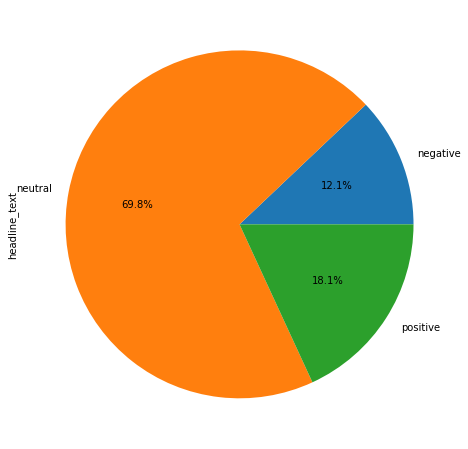

In [56]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.show()

In [57]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100

In [58]:
print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


In [59]:
# ***************************************************************************************************************************************
# ***************************************************************************************************************************************